<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-1">Loading dataset</a></span></li><li><span><a href="#Build-the-network" data-toc-modified-id="Build-the-network-2">Build the network</a></span><ul class="toc-item"><li><span><a href="#construct-edges" data-toc-modified-id="construct-edges-2.1">construct edges</a></span></li><li><span><a href="#build-graph-from-edge-list" data-toc-modified-id="build-graph-from-edge-list-2.2">build graph from edge list</a></span></li><li><span><a href="#add-nodes-attributes" data-toc-modified-id="add-nodes-attributes-2.3">add nodes attributes</a></span></li></ul></li><li><span><a href="#Plot-(sub)network" data-toc-modified-id="Plot-(sub)network-3">Plot (sub)network</a></span></li><li><span><a href="#Network-analysis" data-toc-modified-id="Network-analysis-4">Network analysis</a></span><ul class="toc-item"><li><span><a href="#Connected-components" data-toc-modified-id="Connected-components-4.1">Connected components</a></span><ul class="toc-item"><li><span><a href="#distribution-of-CC-size" data-toc-modified-id="distribution-of-CC-size-4.1.1">distribution of CC size</a></span></li><li><span><a href="#explore-smaller-CCs" data-toc-modified-id="explore-smaller-CCs-4.1.2">explore smaller CCs</a></span></li></ul></li><li><span><a href="#Centralities-measures" data-toc-modified-id="Centralities-measures-4.2">Centralities measures</a></span><ul class="toc-item"><li><span><a href="#Degree" data-toc-modified-id="Degree-4.2.1">Degree</a></span></li><li><span><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-4.2.2">Betweenness centrality</a></span></li></ul></li><li><span><a href="#Assortativities" data-toc-modified-id="Assortativities-4.3">Assortativities</a></span><ul class="toc-item"><li><span><a href="#degree-assortativity" data-toc-modified-id="degree-assortativity-4.3.1">degree assortativity</a></span></li><li><span><a href="#nodes-attributes-assortativity" data-toc-modified-id="nodes-attributes-assortativity-4.3.2">nodes attributes assortativity</a></span></li></ul></li><li><span><a href="#Clustering-coefficient" data-toc-modified-id="Clustering-coefficient-4.4">Clustering coefficient</a></span></li><li><span><a href="#Num.-ingredients-VS-degree" data-toc-modified-id="Num.-ingredients-VS-degree-4.5">Num. ingredients VS degree</a></span></li><li><span><a href="#Community--analysis" data-toc-modified-id="Community--analysis-4.6">Community  analysis</a></span><ul class="toc-item"><li><span><a href="#detect-communities" data-toc-modified-id="detect-communities-4.6.1">detect communities</a></span></li><li><span><a href="#preparing-communities-data" data-toc-modified-id="preparing-communities-data-4.6.2">preparing communities data</a></span></li><li><span><a href="#communities-size" data-toc-modified-id="communities-size-4.6.3">communities size</a></span></li><li><span><a href="#plot-communities" data-toc-modified-id="plot-communities-4.6.4">plot communities</a></span></li><li><span><a href="#nutrients-across-communities" data-toc-modified-id="nutrients-across-communities-4.6.5">nutrients across communities</a></span></li><li><span><a href="#nutrients-within-main-communities" data-toc-modified-id="nutrients-within-main-communities-4.6.6">nutrients within main communities</a></span></li><li><span><a href="#deeper-exploration--of-relevant-communities" data-toc-modified-id="deeper-exploration--of-relevant-communities-4.6.7">deeper exploration  of relevant communities</a></span><ul class="toc-item"><li><span><a href="#communiy-1" data-toc-modified-id="communiy-1-4.6.7.1">communiy 1</a></span></li><li><span><a href="#communiy-2" data-toc-modified-id="communiy-2-4.6.7.2">communiy 2</a></span></li><li><span><a href="#communiy-3" data-toc-modified-id="communiy-3-4.6.7.3">communiy 3</a></span></li><li><span><a href="#community-0" data-toc-modified-id="community-0-4.6.7.4">community 0</a></span></li><li><span><a href="#communiy-13" data-toc-modified-id="communiy-13-4.6.7.5">communiy 13</a></span></li><li><span><a href="#communiy-12" data-toc-modified-id="communiy-12-4.6.7.6">communiy 12</a></span></li><li><span><a href="#communiy-8" data-toc-modified-id="communiy-8-4.6.7.7">communiy 8</a></span></li><li><span><a href="#communiy-10" data-toc-modified-id="communiy-10-4.6.7.8">communiy 10</a></span></li><li><span><a href="#community-5" data-toc-modified-id="community-5-4.6.7.9">community 5</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#OTHER-CODE" data-toc-modified-id="OTHER-CODE-5">OTHER CODE</a></span></li></ul></div>

<center>
    <big>
        <b>
    Products network
         </b>
     </big>
 </center>

In [1]:
import pandas as pd
import numpy as np

# modules for plotting
import matplotlib.pyplot as plt
%matplotlib inline
inline_rc = plt.rcParams

import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# for string manipulation
import re

# modules for stats
from scipy import stats
import powerlaw 
import itertools as itt

# modules for network analysis
import networkx as nx
import community
import pickle

# module to save space
import gc

# Loading dataset

(large data dump from the [api git repo](https://github.com/salathegroup/openfood_api/tree/master/data) )

(for the time begin we use the _french_ ingredients, as is the languages with the most products)

In [384]:
# food_df = pd.DataFrame.from_csv('./important_datasets/ingredients_df.csv')
food_df = pd.DataFrame.from_csv('./important_datasets/nutr_&_categ.csv')

# select few useful fetures  
food_df = food_df[['id','name_simple','carbohydrates','protein','fat','ingredients','ns_label','nutri_score']]

# fix ingredients:  from french only  --> str to dict to list 
def fix_ingr(x):
    
    if 'fr' in eval(x).keys():
        
        # from the fr version, split by commas + remove punctuation --> return cleaned list
        return [re.sub(r'[^\w\s]','',my_str) for my_str in eval(x)['fr'].split(',')]
    
    else:
        return np.nan

food_df.ingredients = food_df.ingredients.apply(fix_ingr)
# remove null ingredients
food_df = food_df[food_df.ingredients.notnull()]

# post-processing overview 
print(food_df.shape)
print(food_df.notnull().sum())
food_df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  from ipykernel import kernelapp as app


(13095, 8)
id               13095
name_simple      13015
carbohydrates    11425
protein          11371
fat              11404
ingredients      13095
ns_label         13095
nutri_score      13095
dtype: int64


,id,name_simple,carbohydrates,protein,fat,ingredients,ns_label,nutri_score
0,1000,Bio Spaghetti,75.0,11.0,0.42,[Pâtes de semoule de blé dur de qualité supéri...,A,-1
1,10000,M Classic Coeurs de palmier,4.0,2.0,0.50,"[cœurs de palmier 55 Pérou, eau, sel de cuis...",A,-3
2,10001,M Classic Points d'asperges blanches,3.5,2.0,0.50,"[asperges blanches Chine, eau, sel de cuisin...",A,-3
3,10002,Migros Sélection Asperges,2.0,1.0,0.00,"[asperges blanches Pérou 60, eau, sel de cui...",A,-2
4,10003,M Classic Fonds D'Artichauts,4.5,1.5,1.00,"[fonds dartichauts 60 Pérou, eau, sel de cui...",A,-3


Mind that:

- if cells run fast (`execution time < 1 s`) ---> analysis it's done on small ( usually 1000 nodes ) subset of the whole network
- if cells run slowly (`execution time >> 1 s`) ---> analysis it's done on the _entire graph_ ( > 10k nodes)

# Build the network

## construct edges

In [85]:
%%time

edge_list  = []

# loop until the one but last row
for row in food_df.iloc[:food_df.shape[0]-2,:].itertuples():    
    
    for next_row in food_df.iloc[row.Index+1:,:].itertuples():

        n_shared_ingrs = len(set(row.ingredients) & set(next_row.ingredients))

        if n_shared_ingrs > 0:

            edge_list.append([row.id,next_row.id,{'weight':n_shared_ingrs}])

# check N. edges
len(edge_list)

CPU times: user 3min 2s, sys: 2.6 s, total: 3min 5s
Wall time: 3min 5s


In [98]:
# save edges list to file
with open('products_edges.txt','wb') as my_file:
    pickle.dump(edge_list,my_file)

# save space
del edge_list
gc.collect();

## build graph from edge list 

In [ ]:
%%time

with open('./products_edges.txt','rb') as f:
     products_edges_full = pickle.load(f)

print(len(products_edges_full))

make the graph

In [110]:
%time products_graph = nx.from_edgelist(products_edges_full)

print('number_of_edges:',products_graph.number_of_edges())
print('number_of_nodes:',products_graph.number_of_nodes())

CPU times: user 25.9 s, sys: 3.76 s, total: 29.6 s
Wall time: 29.8 s
number_of_edges: 13574451
number_of_nodes: 11379


save space!

In [111]:
del products_edges_full
gc.collect();

mind that the number of nodes is __smaller__ than the number of products selected in `parallel_products_net.py`,
because we only output the ones _with some connections_ - 

(so basically all disconnected nodes should be absent)

## add nodes attributes

In [114]:
%%time

for my_node in products_graph.nodes():
    
    products_graph.node[my_node]['fat'] = food_df.fat[food_df.id==my_node]
    products_graph.node[my_node]['protein'] = food_df.protein[food_df.id==my_node] 
    products_graph.node[my_node]['carbohydrates'] = food_df.carbohydrates[food_df.id==my_node] 
    products_graph.node[my_node]['nutri_score'] = food_df.nutri_score[food_df.id==my_node]

CPU times: user 19.4 s, sys: 111 ms, total: 19.5 s
Wall time: 19.7 s


In [115]:
# save space
del food_df
gc.collect();

In [118]:
products_graph.

13574451

__size of the graph__

In [119]:
import sys

In [127]:
(sys.getsizeof(list(products_graph.nodes)) + sys.getsizeof(list(products_graph.edges))) / 10**6

122.272688

# Plot (sub)network

custom function for plot of the entire graph, or subset

In [137]:
def plot_my_grapy(my_graph):
    
    # choose the layout
    pos = nx.spring_layout(my_graph)

    # get width of the edges     
    edgewidth = [ d['weight'] for (u,v,d) in my_graph.edges(data=True)]
    
    nx.draw_networkx_nodes(my_graph, pos,node_size=1)
    nx.draw_networkx_edges(my_graph, pos, width = np.array(edgewidth)/10)
    plt.axis('off');

# Network analysis

given the time required for the analysis (sometimes ~ 1h) we will continue the analysis _on the IC cluster_

## Connected components 
please, see 
[here](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html)
the relative documentation on networkx 

(here is an 
[example](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/giant_component.html)
on how to plot the  giant component)

In [128]:
%%time

connected_comp = list(nx.connected_component_subgraphs(products_graph))

print('number of connected components:',len(connected_comp))

number of connected components: 41
CPU times: user 2min 14s, sys: 19.7 s, total: 2min 34s
Wall time: 2min 37s


### distribution of CC size

In [129]:
components_size = pd.Series([my_cc.number_of_nodes() for my_cc in connected_comp])

# just as a check
sum(components_size)==products_graph.number_of_nodes()

True

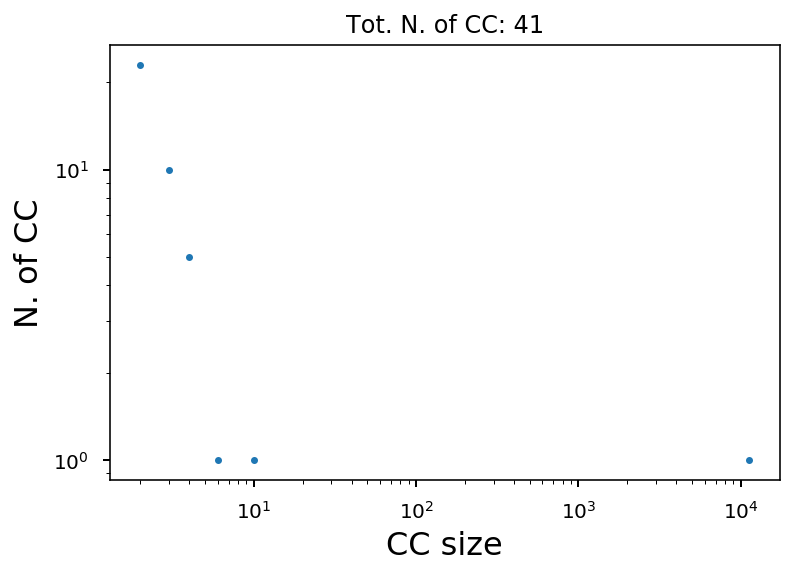

In [130]:
plt.loglog(components_size.value_counts(),marker='.',linestyle='')

plt.title('Tot. N. of CC: {}'.format(len(connected_comp)))
plt.ylabel('N. of CC', size=16)
plt.xlabel('CC size', size=16);

# plt.savefig('./products_network_plots/CC_size_distribution.pdf')

In [133]:
components_size.sort_values(ascending=False)

0     11267
37       10
38        6
3         4
6         4
7         4
12        4
27        4
23        3
2         3
5         3
9         3
21        3
22        3
20        3
30        3
35        3
33        3
24        2
1         2
36        2
4         2
34        2
32        2
8         2
31        2
10        2
11        2
25        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
39        2
29        2
28        2
26        2
40        2
dtype: int64

### explore smaller CCs 

In the main df, add the connected component __name__ _to which each products belongs_

In [134]:
for i in range(len(connected_comp)):    
    food_df.loc[food_df.id.isin(connected_comp[i].nodes()),'connected_component'] = i

re-count NaN in CC:

In [140]:
food_df.connected_component.isnull().sum()

12284

...that is indeed  the number of products that _were not included in the graph_ <==> all isolated products...

In [141]:
food_df.shape[0] - products_graph.number_of_nodes()

12284

... as a check, indeed: all the CCs are have at least 2 products

In [135]:
sum(components_size<2)

0

save all CCs - expect for  the largest one

In [25]:
# food_df.loc[food_df.connected_component!=0,['name','connected_component']]. \
#         sort_values(by='connected_component'). \
#         to_csv('./products_network_plots/small_connected_components.csv')

closer look to the largest 'secondary' CC : it's weird that water and milk products are not connected to the main CC, as are indeed very basic ingredients ... (???)

__milk CC__

In [142]:
connected_comp[37].nodes()

NodeView((15742, 21646, 4526, 4530, 4531, 4534, 6579, 6594, 6597, 6599))

__water CC__

In [143]:
connected_comp[38].nodes()

NodeView((15787, 4915, 4934, 4935, 4936, 4944))

check completeness 

In [48]:
# def check_if_complete(my_graph):  
#     return my_graph.number_of_edges()==my_graph.number_of_nodes()*(my_graph.number_of_nodes()-1)/2

## Centralities measures

### Degree

degree distribution on _whole graph_

In [197]:
full_weighted_degree = products_graph.degree(weight='weight')

plot degree dist  on whole graph

In [158]:
# # # sns.distplot(full_weighted_degree,kde=False)

# plt.hist(dict(full_weighted_degree).values)

# plt.ylabel('number of nodes',size=16)
# plt.xlabel('products\' weighted degree',size=16);

# # plt.savefig('./products_network_plots/weighted_degree_dist_full.pdf')

degree distribution on _largest CC_

In [198]:
largest_CC_weighted_degree = dict(connected_comp[0].degree(weight='weight'))

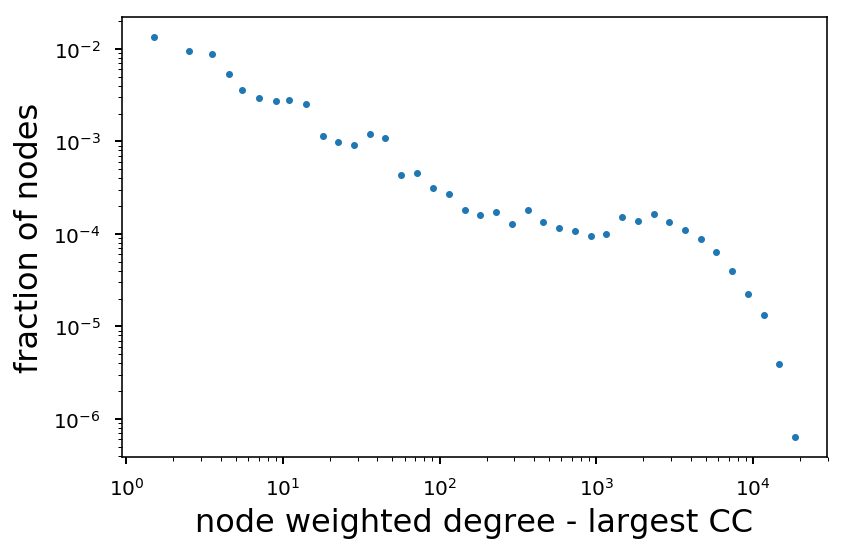

In [245]:
## simple hist 
# sns.distplot(list(largest_CC_weighted_degree.values()),kde=False)

## dist with LOGARITHMIC binning !
powerlaw.plot_pdf(degree_list,marker='.',linestyle='')

# plt.ylabel('number of nodes',size=16)
plt.ylabel('fraction of nodes',size=16)
plt.xlabel('node weighted degree - largest CC',size=16);

# plt.yscale('log')
# plt.xscale('log')
plt.tight_layout()

plt.savefig('./products_network_plots/weighted_degree_dist_largest_CC.pdf')

In [314]:
# cleanup
del neigh_weigh_deg_largest_CC,degree_list
gc.collect();

### Betweenness centrality

for parallelized implementation, credit to  
[this code example](https://networkx.github.io/documentation/development/examples/advanced/parallel_betweenness.html)

In [19]:
import parallel_betweenness as par_bet

stop! as it takes too much time! - also on parallel! - on the cluster even the RAM got stuck

In [9]:
# betweenness_ingredients = nx.betweenness_centrality(products_graph)
# %time betweenness_ingredients = par_bet.betweenness_centrality_parallel(products_graph)

In [20]:
# sns.distplot(list(betweenness_ingredients.values()),kde=False)

# # plt.xscale('log')
# plt.yscale('log')

# plt.ylabel('number of products',size=16)
# plt.xlabel('products\' betweenness',size=16);

## Assortativities

### degree assortativity

In [218]:
# %time nx.degree_assortativity_coefficient(products_graph)

In [219]:
%time nx.degree_assortativity_coefficient(connected_comp[0])

CPU times: user 1min 15s, sys: 4.22 s, total: 1min 19s
Wall time: 1min 20s


-0.2617455447369047

 one can see *subset of products* with some __(anti)-correlated average_neighbor_degree__

In [221]:
%time neigh_weigh_deg_largest_CC = nx.average_neighbor_degree(connected_comp[0],weight='weight')

CPU times: user 1min 16s, sys: 2.72 s, total: 1min 18s
Wall time: 1min 18s


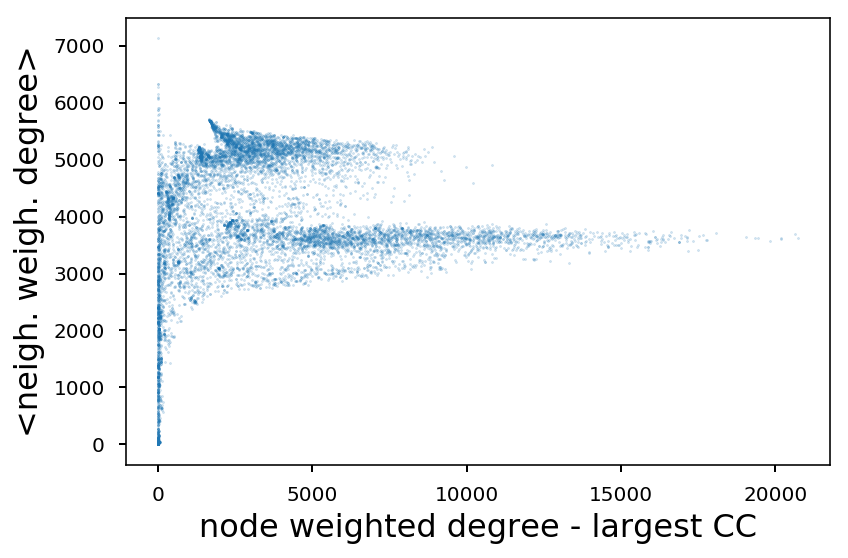

In [242]:
plt.scatter(largest_CC_weighted_degree.values(),
            neigh_weigh_deg_largest_CC.values(),
            s=1,alpha=0.2)

plt.xlabel('node weighted degree - largest CC',size=16)
# plt.ylabel('average neighbors weighted degree - largest CC',size=16);
plt.ylabel('<neigh. weigh. degree>',size=16);

plt.tight_layout()

plt.savefig('./products_network_plots/average_neighbor_degree_largest_cc_only.pdf',bbox_inches='tight')

### nodes attributes assortativity

custom function to compute average attribute of _node's neighbors_

In [335]:
def average_neighbor_attribute(my_graph,my_attribute):
    mean_list = []
    for my_node in my_graph.nodes():

        mean_list.append(np.nanmean([ my_graph.node[my_neighbor][my_attribute].values\
                               for my_neighbor in my_graph.neighbors(my_node)]))
    return mean_list

__fat__ assortativity

In [45]:
# it takes too much time...anyway, the value is probably very small, as you can see from the plot below
#nx.attribute_assortativity_coefficient(products_graph,'fat')

set _neighbors_ data in a dataframe and plot correlation 

In [336]:
%time ave_neigh_fat = average_neighbor_attribute(connected_comp[0],'fat')

CPU times: user 1min 10s, sys: 177 ms, total: 1min 10s
Wall time: 1min 10s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Mean of empty slice


In [349]:
# plt.scatter(nx.get_node_attributes(connected_comp[0],'fat').values(),ave_neigh_fat,s=1)

# plt.xlabel('node fat',size=16)
# plt.ylabel('average neighbors fat',size=16);

# plt.tight_layout()
# # plt.savefig('./products_network_plots/neighbours_fat_largest_CC.pdf')

__protein__ assortativity

In [49]:
# it takes too much time...anyway, the value is probably very small, as you can see from the plot below
# nx.attribute_assortativity_coefficient(products_graph,'protein')

In [363]:
# %%time

# neighbors_protein_df = pd.DataFrame.from_dict(nx.get_node_attributes(connected_comp[0],'protein'),orient='index')
# neighbors_protein_df.columns = ['node_protein']
# neighbors_protein_df['neighbors_protein'] = average_neighbor_attribute(connected_comp[0],'protein')

# # eliminate NaNs
# neighbors_protein_df.dropna(inplace=True)

# print(neighbors_protein_df.shape)

In [362]:
# plt.scatter(neighbors_protein_df.node_protein,neighbors_protein_df.neighbors_protein,s=1)

# plt.xlabel('node protein',size=16)
# plt.ylabel('average neighbors protein',size=16);

# plt.savefig('./products_network_plots/neighbours_protein_largest_CC.pdf')

__carbs__ assortativity

In [53]:
# it takes too much time...anyway, the value is probably very small, as you can see from the plot below
# nx.attribute_assortativity_coefficient(products_graph,'carbohydrates')

In [364]:
# %%time

# neighbors_carbohydrates_df = pd.DataFrame.from_dict(nx.get_node_attributes(connected_comp[0],'carbohydrates'),orient='index')
# neighbors_carbohydrates_df.columns = ['node_carbohydrates']
# neighbors_carbohydrates_df['neighbors_carbohydrates'] = average_neighbor_attribute(connected_comp[0],'carbohydrates')

# # eliminate NaNs
# neighbors_carbohydrates_df.dropna(inplace=True)

# print(neighbors_carbohydrates_df.shape)

In [365]:
# non_wrong = neighbors_carbohydrates_df.node_carbohydrates<101

# plt.scatter(neighbors_carbohydrates_df.node_carbohydrates[non_wrong],
#             neighbors_carbohydrates_df.neighbors_carbohydrates[non_wrong],
#             s=1)

# plt.xlabel('node carbohydrates',size=16)
# plt.ylabel('average neighbors carbohydrates',size=16);

# plt.savefig('./products_network_plots/neighbours_carbos_largest_CC.pdf')

## Clustering coefficient

In [361]:
# it takes too much time...
# %time clustering_ingredients = nx.clustering(connected_comp[0])

In [61]:
# sns.distplot(list(clustering_ingredients.values()),kde=False)

# # plt.yscale('log')

# plt.ylabel('number of products',size=16)
# plt.xlabel('products\' clustering coefficient',size=16);

here we check the 'usual' (??) anti-correlation between betweenness_centrality and clustering coefficient:

(too long to compute the betweenness...maybe not so relevant...)

In [84]:
# plt.scatter(np.fromiter(clustering_ingredients.values(),dtype=float),
#             np.fromiter(betweenness_ingredients.values(),dtype=float),s=5)

# # plt.yscale('log')

# plt.xlabel('products\' clustering coefficient',size=16)
# plt.ylabel('products\' betweenness',size=16);

## Num. ingredients VS degree

count # ingredients in each product

In [53]:
ingred_counts = pd.Series([len(str_to_list(my_list)) for \
                           my_list in food_df[food_df.barcode.isin(connected_comp[0].nodes())].ingredients])

check that indeeed we took _only the ondes of the largest CC_ ! 

In [54]:
len(ingred_counts)==len(connected_comp[0])

True

plot distribution of number of ingredients / product

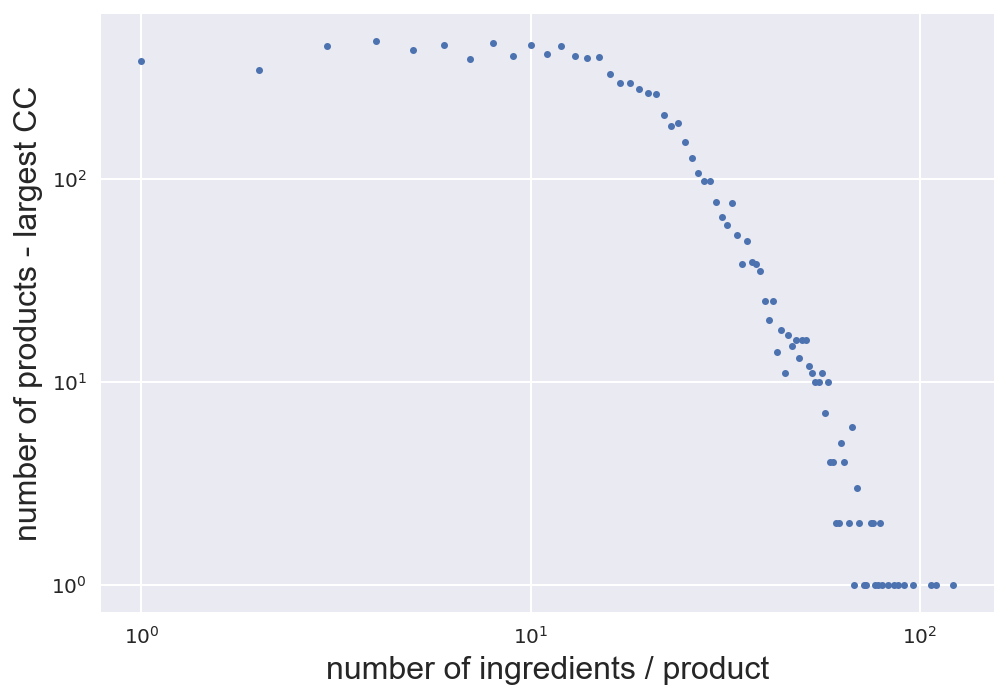

In [56]:
plt.loglog(ingred_counts.value_counts(),marker='.',linestyle='')

plt.ylabel('number of products - largest CC',size=16)
plt.xlabel('number of ingredients / product',size=16);

plt.savefig('./products_network_plots/num_ingr_per_prod_dist.pdf')

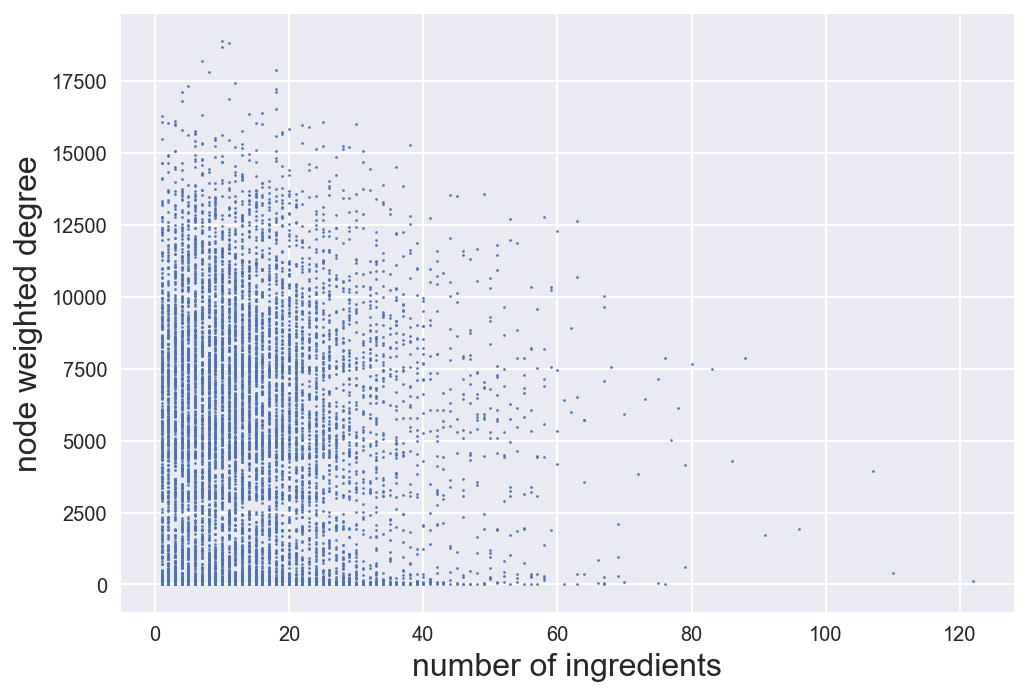

In [57]:
plt.scatter(ingred_counts,list(largest_CC_weighted_degree.values()),s=1)


plt.xlabel('number of ingredients',size=16);
plt.ylabel('node weighted degree',size=16)


plt.savefig('./products_network_plots/num_ingr_VS_deg.pdf')

we found _no significant correlation_

In [58]:
stats.pearsonr(ingred_counts,list(largest_CC_weighted_degree.values()))

(-0.012727611424825818, 0.20237444826259807)

## Community  analysis

### detect communities

(it makes sense to run it rather _only on the largest connected component_)

this computation has been done on the IC cluster - results are saved in the next cell

In [366]:
# it's taking a lot of time...better to run in the cluster...

%time partition = community.best_partition(connected_comp[0])
print('number of communities:', len(set(partition.values())))

CPU times: user 6min 3s, sys: 8.54 s, total: 6min 12s
Wall time: 6min 15s
number of communities: 29


save the partitions!

In [367]:
with open('largest_cc_partitions_prod_net.pkl','wb') as my_f:
    pickle.dump(partition,my_f)

reload the partitions

In [60]:
# with open('./important_datasets/largest_cc_partitions_prod_net.pkl', 'rb') as handle:
#     partition = pickle.load(handle)

### preparing communities data

In [12]:
# just a check
# len(partition)==len(connected_comp[0])

_save community label_ in the original dataframe

In [390]:
%%time
for my_id in partition.keys():
    food_df.loc[food_df.id==my_id,'community'] = partition[my_id]

CPU times: user 27 s, sys: 119 ms, total: 27.1 s
Wall time: 27.1 s


In [391]:
# food_df.community = food_df.community.astype(str,raise_on_error=False)

# test the result
food_df.dtypes

id                 int64
name_simple       object
carbohydrates    float64
protein          float64
fat              float64
ingredients       object
ns_label          object
nutri_score        int64
community         object
dtype: object

In [392]:
food_df.isnull().sum()

id                  0
name_simple        80
carbohydrates    1670
protein          1724
fat              1691
ingredients         0
ns_label            0
nutri_score         0
community           0
dtype: int64

In [393]:
food_df.community.unique()

array(['nan', 0, 1, 4, 3, 2, 6, 8, 10, 11, 5, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 15, 22, 7, 23, 25, 24, 26, 9, 27, 28], dtype=object)

### communities size

In [394]:
# just a check
len(partition)==connected_comp[0].number_of_nodes()

True

In terms of size, there seems to be 3 groups roughly:

- large ones (# nodes >~ 1000):

- middle ones ( # nodes >~ 10):
    
- small ones

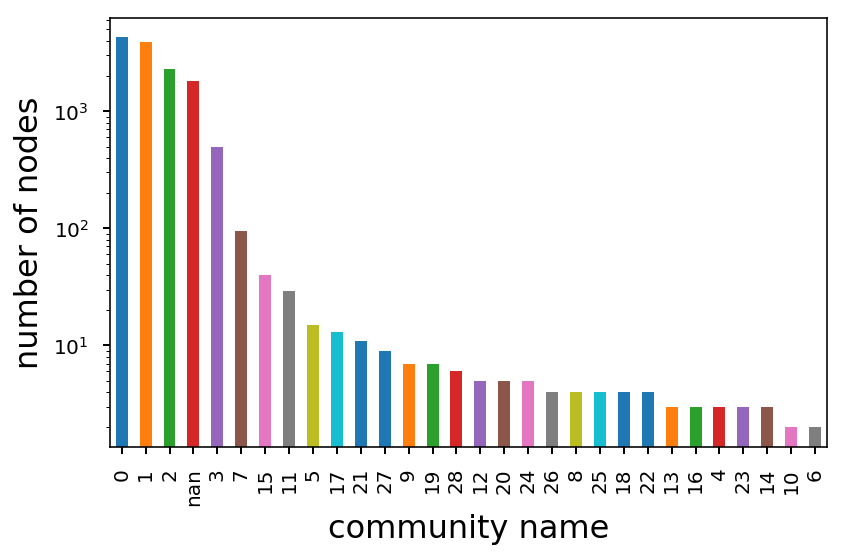

In [396]:
food_df.community.value_counts().plot.bar()

plt.yscale('log')

plt.xlabel('community name',size=16)
plt.ylabel('number of nodes',size=16);

plt.tight_layout()
plt.savefig('./products_network_plots/communities_size.pdf')

### plot communities 

custom function to draw communities:

In [25]:
# it should work, but it useless, 
# as it's impossible to plot such huge graph

# def plot_all_communites(my_partition,my_graph):
    
#     size = float(len(set(my_partition.values())))
#     pos = nx.spring_layout(my_graph)

#     count = 0.
#     for com in set(my_partition.values()) :
#         count = count + 1.
#         list_nodes = [nodes for nodes in my_partition.keys()
#                                     if my_partition[nodes] == com]
#         nx.draw_networkx_nodes(my_graph, pos, list_nodes, node_size = 2,
#                                     node_color = str(count / size))

#     edgewidth = [ d['weight'] for (u,v,d) in my_graph.edges(data=True)]
#     nx.draw_networkx_edges(my_graph,pos, width = np.array(edgewidth)/100)
#     plt.axis('off')
#     plt.show();

In [383]:
def plot_single_community(my_partition,my_graph,my_comm):
    
    #  extract nodes. of that community
    list_nodes = [node for node in my_partition.keys() if my_partition[node] == my_comm]
    
    my_subgraph =  my_graph.subgraph(list_nodes)
    pos = nx.spring_layout(my_subgraph)
    
    #   get relevant attributs for node colors
    energy_vals = [n[1]['energy'] for n in my_subgraph.nodes(data=True)]
    
    #   draw selected nodes  
    plot_nodes = nx.draw_networkx_nodes(my_subgraph, pos, cmap=plt.get_cmap('jet'),
                           node_size = 1,node_color = energy_vals)
    
    # build color bar     
    plt.colorbar(plot_nodes,label='energy')
    
    # draw edges     
    edgewidth = [ d['weight'] for (u,v,d) in my_subgraph.edges(data=True)]
    nx.draw_networkx_edges(my_subgraph, pos, width = np.array(edgewidth)/1000)
    plt.axis('off')
    
    # show and save fig     
    plt.title('community N {}'.format(my_comm))
    plt.savefig('./products_network_plots/community_{}.pdf'.format(my_comm));
    plt.show()

saving directly some smaller communities in the plots folder

In [24]:
# plt.rcParams['figure.figsize'] = [12,12]
# # plt.rcdefaults()

# %time plot_single_community(partition,products_graph,1);

communities __0__ and __2__ are _too large to be plotted_ - also _1_ takes quite some time and RAM ...

### nutrients across communities

__carbs__ across communities

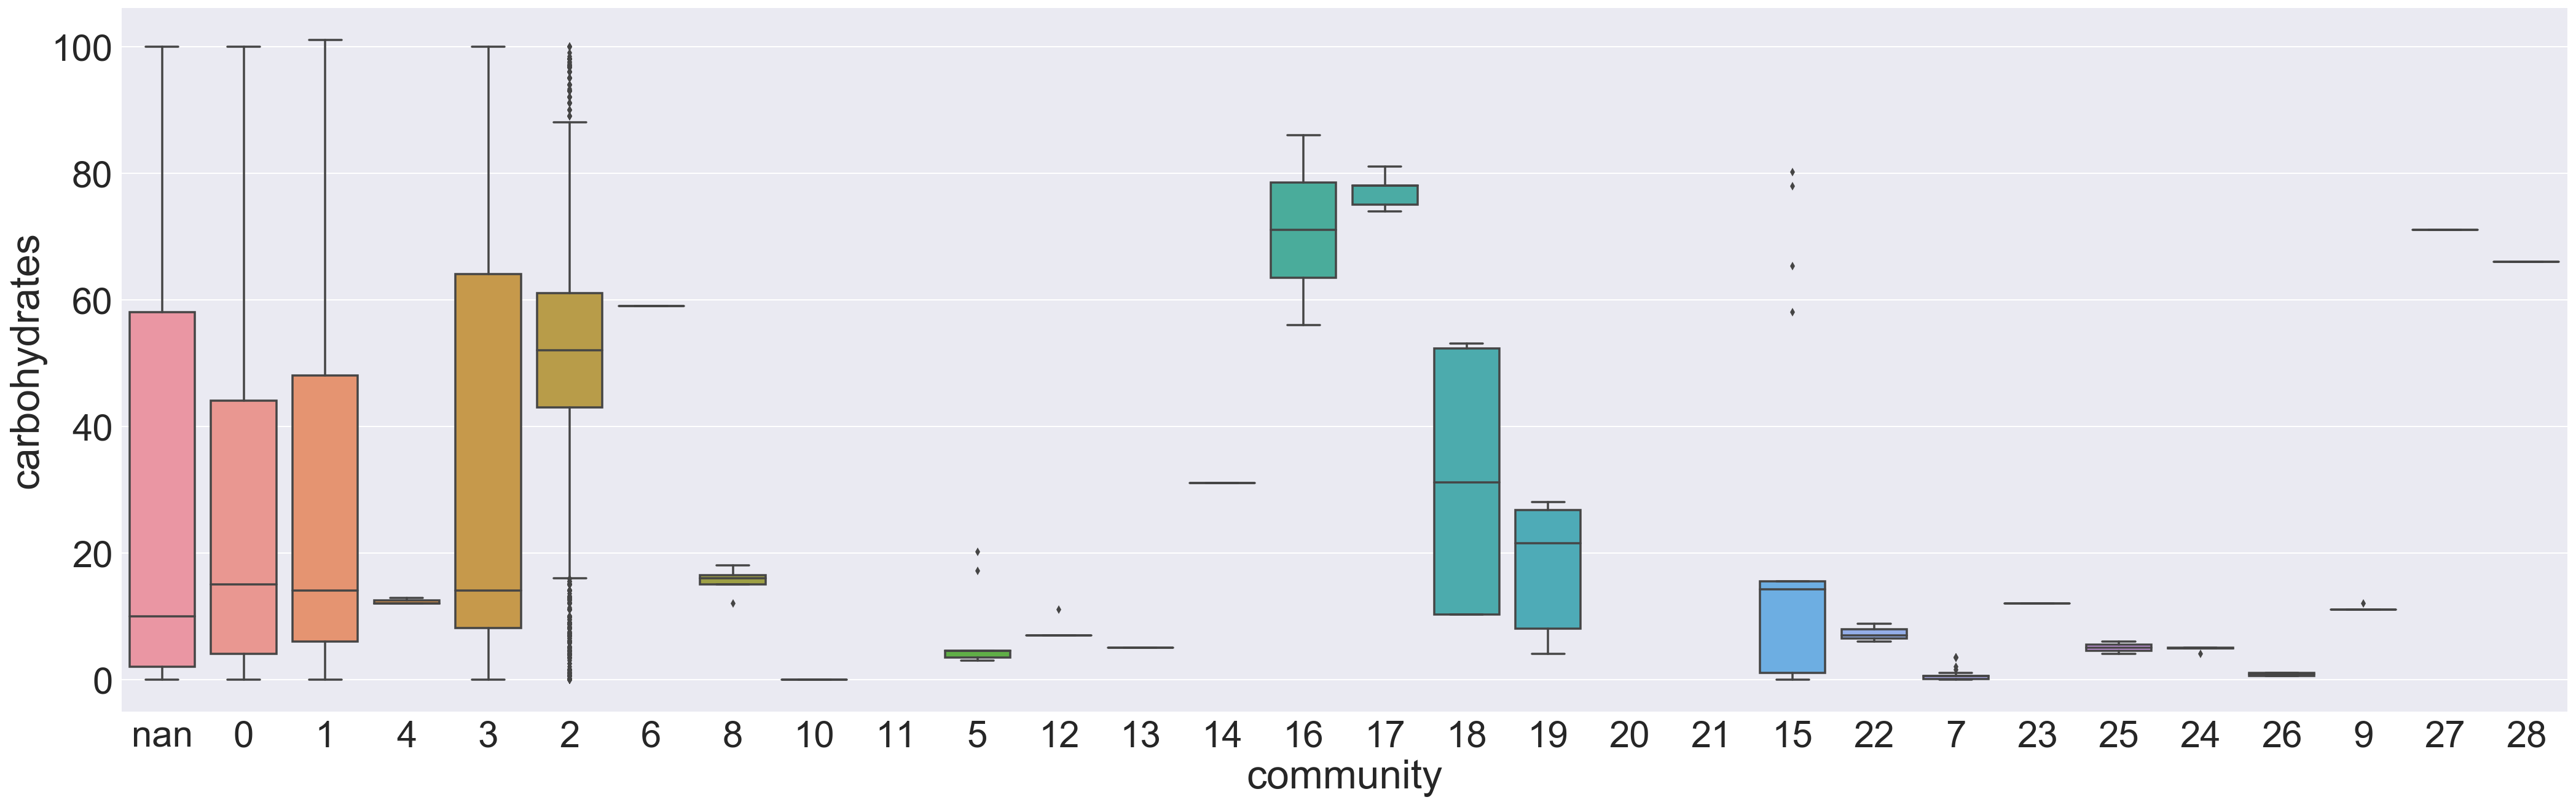

In [403]:
sns.set(font_scale=3)  

sns.factorplot(data=food_df,y='carbohydrates',x='community',kind='box',size=10,aspect=3);

plt.tight_layout();
plt.savefig('products_network_plots/carbos_across_communities.pdf')

__fat__ across communities

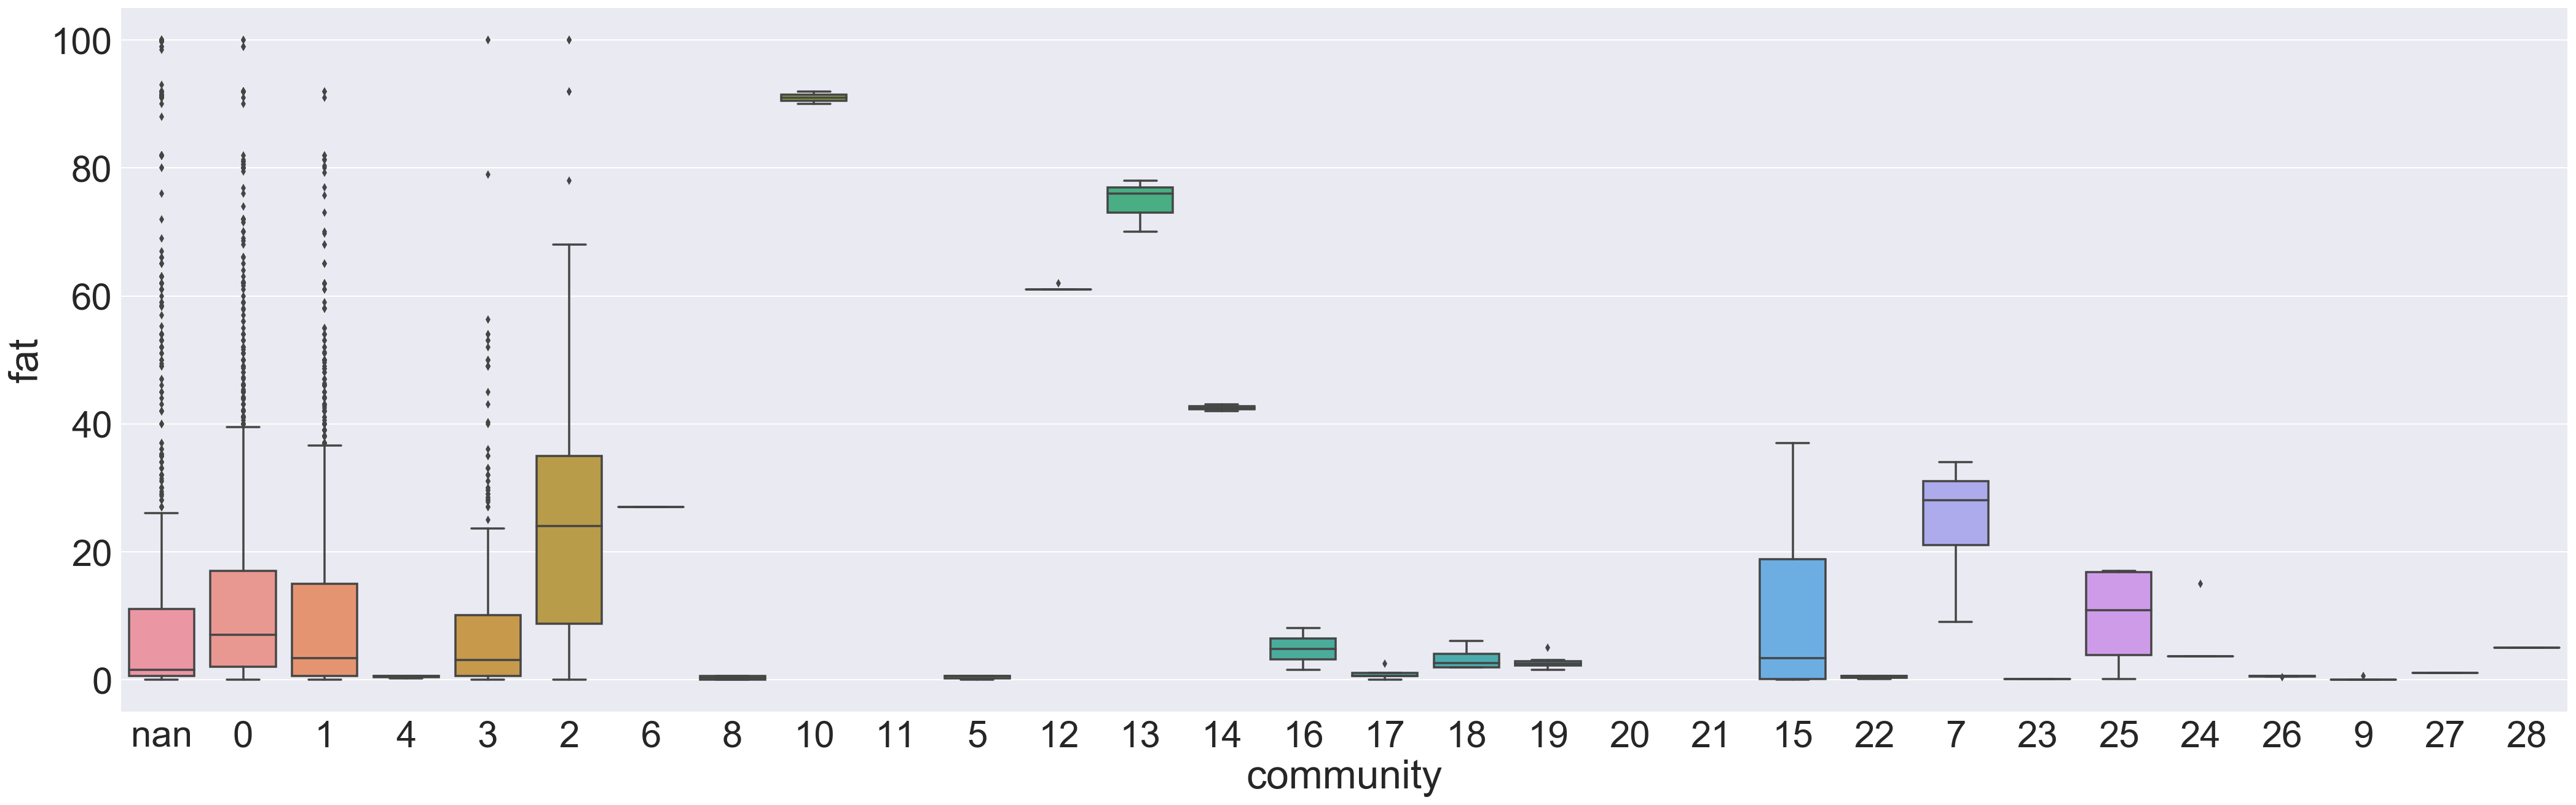

In [405]:
sns.set(font_scale=3)  

sns.factorplot(data=food_df,y='fat',x='community',kind='box',size=10,aspect=3);

plt.tight_layout()
plt.savefig('products_network_plots/fat_across_communities.pdf');

__protein__ across communities

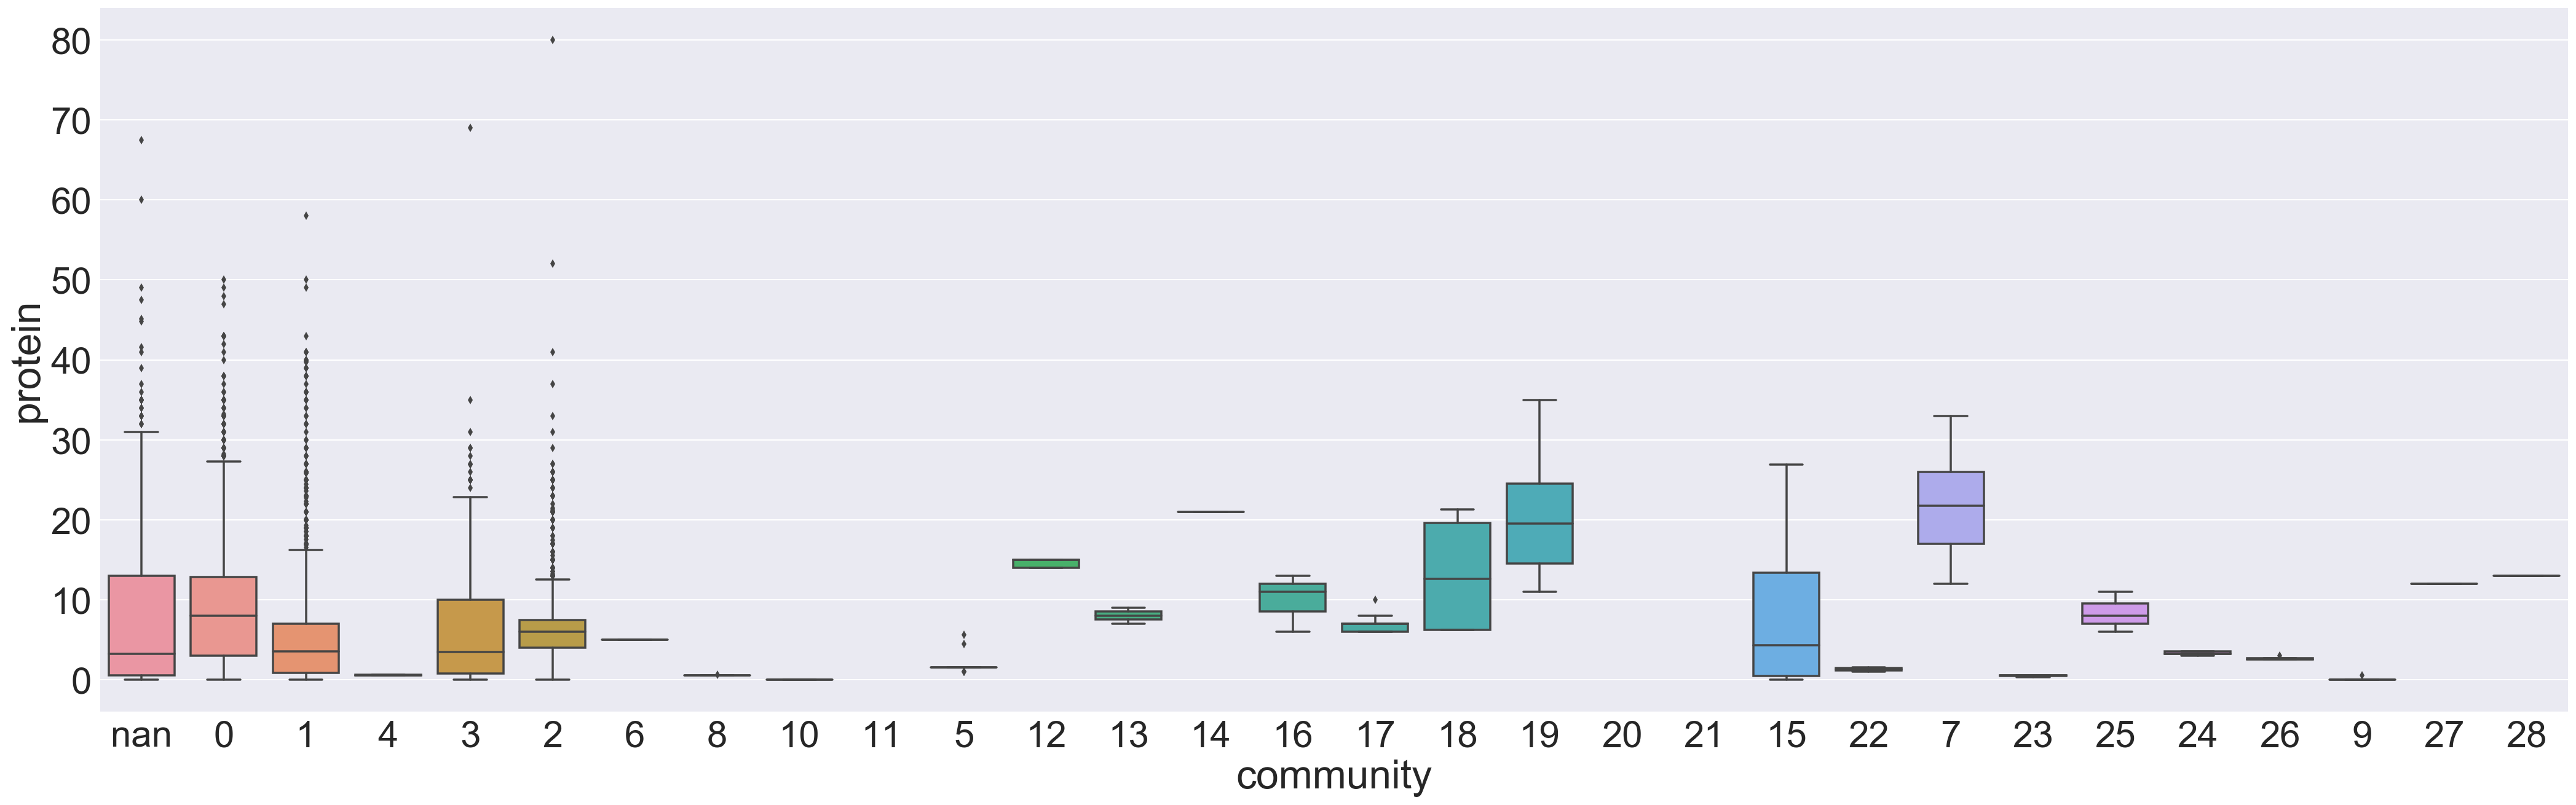

In [406]:
sns.set(font_scale=3)  

sns.factorplot(data=food_df,y='protein',x='community',kind='box',size=10,aspect=3);

plt.tight_layout()
plt.savefig('products_network_plots/protein_across_communities.pdf');

__nutri-score__ across communities

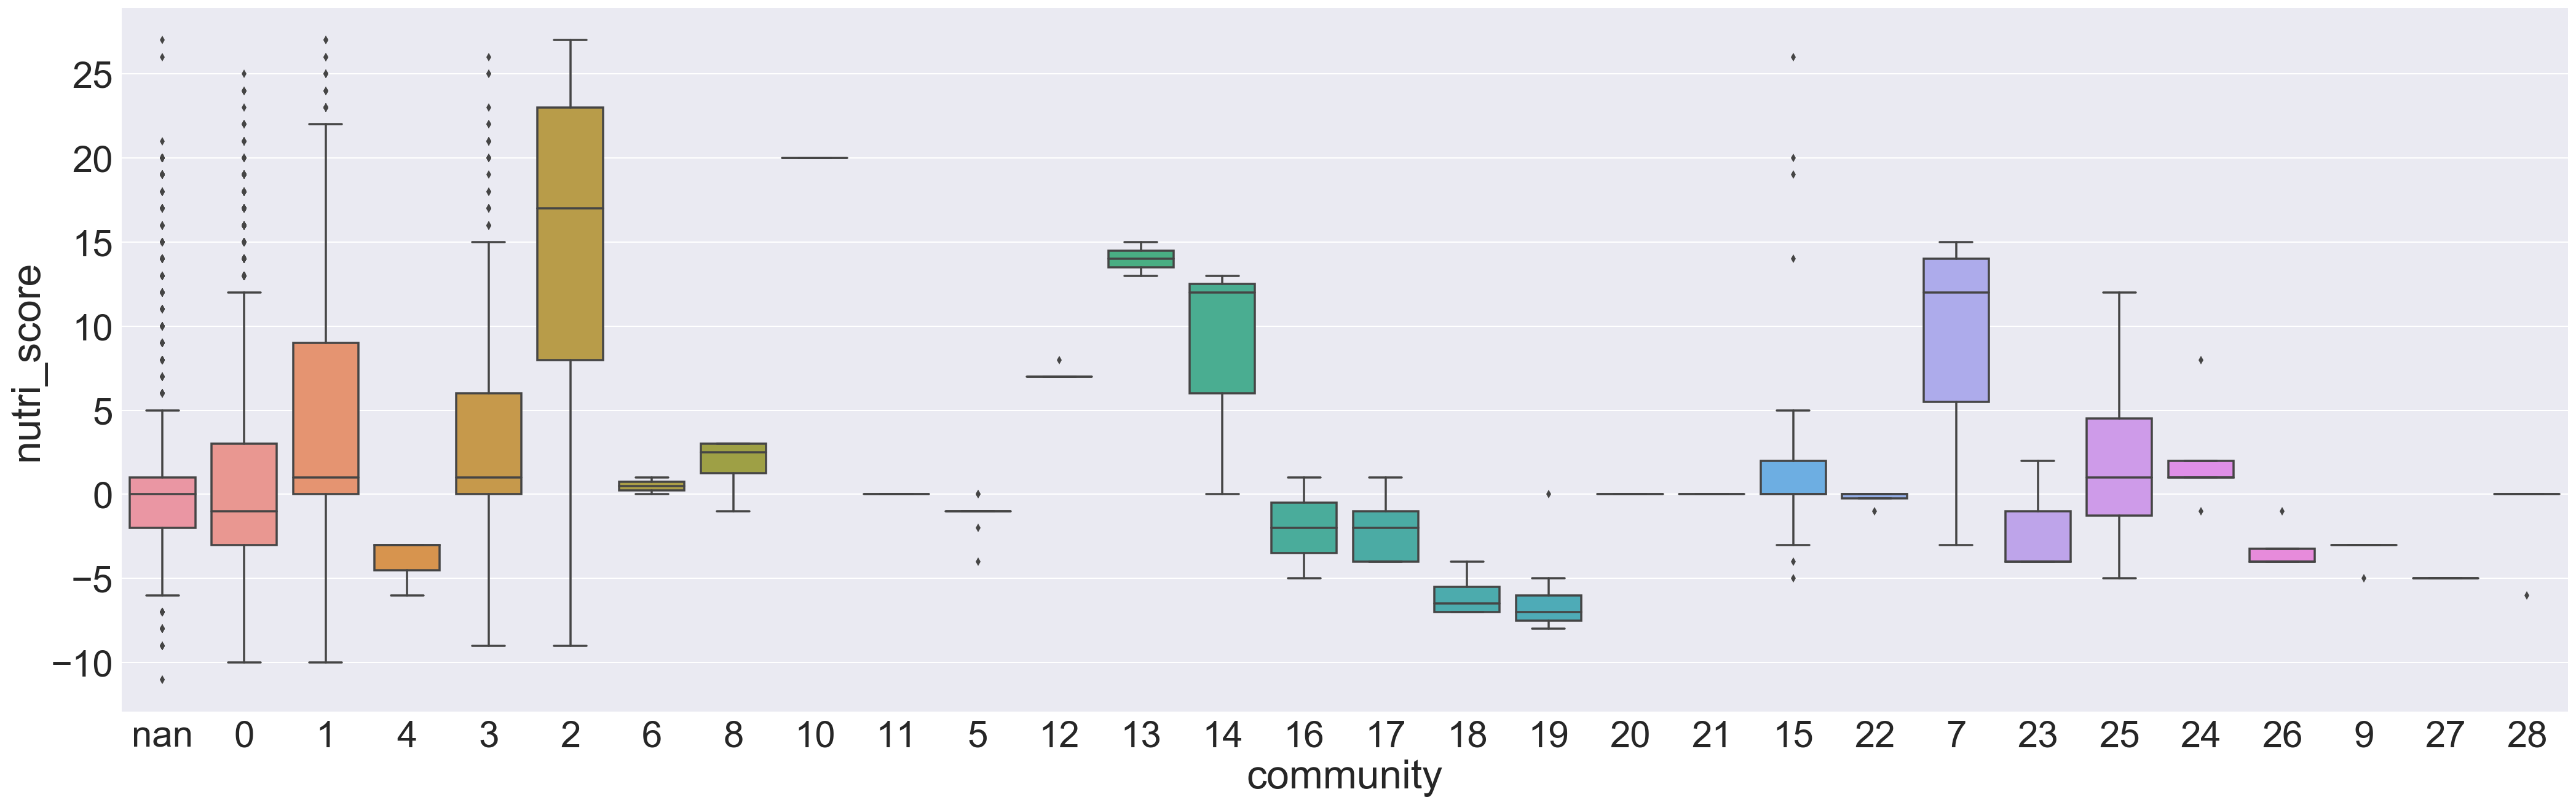

In [407]:
sns.set(font_scale=3)  
sns.factorplot(data=food_df,y='nutri_score',x='community',kind='box',size=10,aspect=3);

plt.tight_layout()
plt.savefig('products_network_plots/nutri_score_across_communities.pdf');

### nutrients within main communities

In [408]:
melted_food_df = pd.melt(food_df,
                         id_vars=['id','ingredients', 'name_simple', 'community'],
                         value_vars=['carbohydrates', 'fat', 'protein'],
                         var_name='nutrients')

# rename `value` column
melted_food_df.rename(columns={'value': 'concentration'},inplace=True);

melted_food_df.shape

(39285, 6)

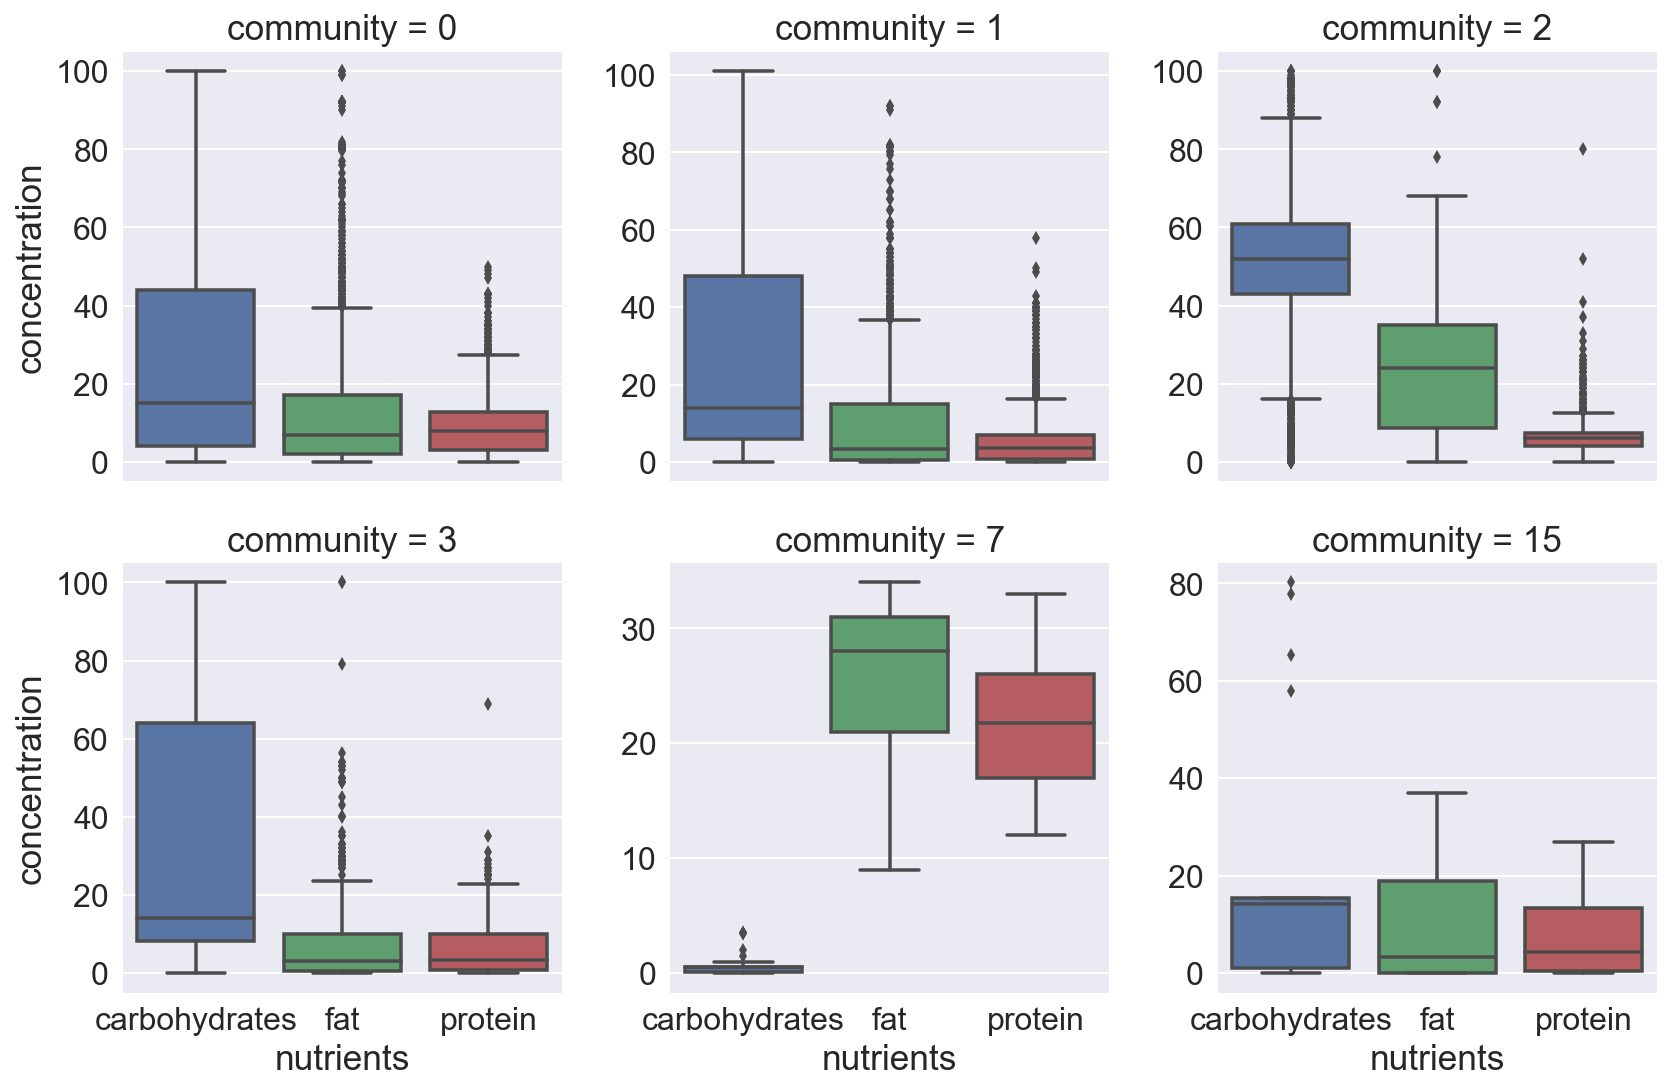

In [415]:
sns.set(font_scale=1.6)

# sns.factorplot(data=melted_food_df,x='nutrients',y='value',sharey=False,
#                kind='box',col_wrap=6,col='community');

# sns.factorplot(data=melted_food_df[melted_food_df.community.isin(['0.0', '3.0', '1.0','2.0'])],
#                x='nutrients',y='concentration',sharey=False,
#                kind='box',col_wrap=2,col='community');

comm_to_plot = [0.0,3.0,1.0,2.0,15.0,7.0]
sns.factorplot(data=melted_food_df[melted_food_df.community.isin(comm_to_plot)],
               x='nutrients',y='concentration',sharey=False,
               kind='box',col_wrap=3,col='community');

# plt.savefig('./products_network_plots/community_nutrients_composition.pdf')
plt.savefig('./products_network_plots/largest_community_nutrients_composition.pdf')

### deeper exploration  of relevant communities

#### communiy 1

this community has clearly:
- _larger amount of carbs and fat_    

wrt to the others, 
as well as wrt to other ingredients

In [70]:
print('number of products in community 1:',sum(food_df.community=='1.0'))

food_df[food_df.community=='1.0'].head(100)

number of products in community 1: 1677


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,connected_component,community
2,NaN,NaN,NaN,NaN,5014328091812,"['thé noir', 'afrique', 'asie & amérique du su...",Tetley Extra Earl Grey,0.0,1.0
4,47.0,459.0,27.0,6.0,7610800011354,"['sucre', ""œuf entier d'élevage au sol"", 'beur...",coop Grossmutter's Schoggicake,0.0,1.0
18,49.0,597.0,39.0,9.0,7610008708506,"['sucre', 'noisettes', 'dont entières', 'pâte...",NaN,0.0,1.0
23,52.0,527.0,31.0,6.0,7616500904811,"['pâte de cacao', 'sucre', ""granulés à l'orang...",FREY SUPREME BOUQUET D' ORANGES,0.0,1.0
28,56.0,550.0,33.0,5.6,7622210172976,"['sucre', 'graisses végétales', 'palme', 'malm...",Milka OREO,0.0,1.0
30,52.0,568.0,37.0,6.1,7610400072878,"['sucre', 'beurre de cacao', 'lait entier en p...",Lindt Chocoletti Summer Edition Swiss Milk Cho...,0.0,1.0
34,4.0,57.0,0.0,10.3,5201054015681,"['lait écrémé', 'ferments lactiques vivants']",FAGE Total 0%,0.0,1.0
39,1.6,22.0,1.1,1.2,7613034365774,"['lait entier en poudre', '73', 'café soluble'...",NESCAFÉ Dolce Gusto CAFÉ CON LECHE,0.0,1.0
51,55.0,543.0,32.0,7.0,7616500654181,"['sucre', 'éclats de noisettes et noisettes mo...",Frey - Classic Branches,0.0,1.0
63,62.3,494.0,24.4,5.5,5000159475358,"['sucre', 'sirop de glucose', 'beurre de cacao...",CelEBraTioNs,0.0,1.0


indeed in this community there are products like: __chocolate bars, cookies, cakes, panettone,...__

In [35]:
# food_df.loc[food_df.community=='1.0',['barcode','name']]

#### communiy 2

In [95]:
my_comm = '2.0'
print('number of products in community {}:'.format(my_comm),sum(food_df.community==my_comm))

food_df[food_df.community==my_comm].head(100)

number of products in community 2.0: 3098


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,connected_component,community
8,60.0,234.0,0.0,3.00,7610845592122,"['abricots', 'conservateur', 'e 220', 'sulfite']",Coop Qualité & Prix Aprikosen süss getrocknet,0.0,2.0
11,100.0,407.0,0.0,0.00,7610278041105,['sucre de betteraves'],AARBERG: WurfelZucker,0.0,2.0
16,7.0,28.0,0.0,0.00,7616800205113,"['eau', 'sucre', 'acidifiant', 'acide citrique...",Migros Ice Tea mit Pfirsicharoma,0.0,2.0
20,17.0,110.0,3.0,3.50,7612464717146,"['lait', 'lait écrémé concentré', 'sucre', 'cr...",Balko Yoplait Yogourt Balko Mocca,0.0,2.0
22,14.0,96.0,3.1,3.00,7613269539957,"['yogourt', 'lait', 'protéines du lait', 'sucr...",M-Budget Joghurt mit Vanille,0.0,2.0
25,99.0,397.0,0.0,0.00,0030800009736,"['sucre', 'sirop de glucose', 'eau', 'arôme na...",NaN,0.0,2.0
33,14.0,95.0,3.0,3.00,22016072,"['yogourt', 'lait', 'protéines du lait', 'sucr...",NaN,0.0,2.0
36,59.0,241.0,0.1,0.05,3608580006046,"['abricots', 'sucre', 'sucre roux de canne', '...",Bonne Maman Konfitûre extra Aprikosen,0.0,2.0
38,11.0,50.0,0.0,0.70,3182280072155,"['eau de source', 'jus de fruits à base de con...",DANAO PFIRSICH APRIKOSE,0.0,2.0
41,NaN,NaN,NaN,NaN,7613331680679,"['fruits séchés', 'prunes', 'poires', 'abricot...",NaN,0.0,2.0


#### communiy 3

In [96]:
my_comm = '3.0'
print('number of products in community {}:'.format(my_comm),sum(food_df.community==my_comm))

food_df[food_df.community==my_comm].head(20)

number of products in community 3.0: 1140


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,connected_component,community
1,67.0,417.0,11.0,11.00,7613269300748,"['pâtes à la semoule de blé dur 57', 'maltodex...",Migros Subito Hot Snack Cheesy,0.0,3.0
15,8.4,597.0,50.0,22.80,7610442292975,"['amandes', 'curry', 'curcuma', 'coriandre', '...",Sun Snack Curry-Mandeln,0.0,3.0
88,78.0,372.0,1.5,9.30,5053827110624,"['riz', 'blé complet', 'sucre', 'orge', '8', ""...",KELLOGG'S : Special K Classic,0.0,3.0
114,87.6,393.0,3.1,0.01,5010478602571,"['sucre', ""correcteur d'acidite"", 'acide maliq...",Swizzels love hearts,0.0,3.0
119,16.0,70.0,0.2,0.50,7613035032422,"['bananes', 'pommes 49', 'jus de citron concen...","Nestle NaturNes Banane, Apfel",0.0,3.0
150,NaN,NaN,NaN,NaN,7613269325352,"['amidon de maïs', 'capsule végétale', 'e464',...",actilife Best Age 50+,0.0,3.0
162,NaN,NaN,NaN,NaN,0070177095949,"['rooibos', 'arôme', '2', 'carthame']",Twinings Golden Caramel Rooibos,0.0,3.0
178,6.2,63.0,2.7,2.80,4104420146846,"['eau', 'carottes', 'riz cuit', 'viande de pou...",Alnatura Gemüsereis mit Huhn,0.0,3.0
180,50.1,444.0,19.7,14.30,7610100017810,"['flocons de pommes de terre', 'produit à base...",Maggi Quick Lunch Kartoffelstock mit Fleischkü...,0.0,3.0
188,62.0,385.0,11.0,8.00,7610827702839,"['fécule de pomme de terre', 'maltodextrine', ...",NaN,0.0,3.0


#### community 0

In [97]:
my_comm = '0.0'
print('number of products in community {}:'.format(my_comm),sum(food_df.community==my_comm))

food_df[food_df.community==my_comm].head(20)

number of products in community 0.0: 3752


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,connected_component,community
0,11.0,93.0,4.5,1.5,7613269763604,"['pommes de terre', 'eau', 'huile de colza', '...",M Budget Kartoffelsalat,0.0,0.0
5,48.0,304.0,8.0,9.0,7611654188469,"['farine de froment', 'eau', 'beurre', ""œuf d'...",Coop Fait Maison Butterzopf,0.0,0.0
7,7.8,68.0,2.7,2.5,7613033314711,"['légumes', 'pommes de terre', 'choux', 'fleur...",Nestle Gartengemüse Kalb,0.0,0.0
12,3.0,316.0,28.0,13.0,3175360000100,"['fromages', 'eau', 'fruits à coques', 'dont n...",NaN,0.0,0.0
17,6.0,41.0,0.0,0.5,7613331098030,"['vinaigre de vin rouge', 'concentré de jus d ...",Coop Qualité & Prix Rotweinessig mit Himbeersaft,0.0,0.0
19,14.0,95.0,0.5,6.0,7616800823508,"['haricots rouges', 'eau', 'sel de cuisine', '...",M Classic Red Kidney Beans,0.0,0.0
21,73.0,357.0,1.0,14.0,8000139910265,['semoule de blé dur'],Garofalo Radiatori La Pasta di Gragnano presso...,0.0,0.0
32,NaN,NaN,NaN,NaN,7610848704638,"['eau', ""malt d'orge"", 'malt de froment', 'hou...",FRI-MOUSSE BARBEBLANCHE,0.0,0.0
35,72.1,354.0,1.5,12.0,5201193106028,"['semoule de blé dur', 'eau']",Melissa Barley Wholesale,0.0,0.0
44,13.0,75.0,1.0,2.5,7617027916011,"['maïs', 'hongrie', 'eau', 'sel de cuisine', '...",MIGROS : Maiskörner Bio,0.0,0.0


#### communiy 13

this community has clearly:
- largest amount of carbs
- low fat

In [91]:
my_comm = '13.0'
print('number of products in community {}:'.format(my_comm),sum(food_df.community==my_comm))

food_df[food_df.community==my_comm].head(20)

number of products in community 13.0: 50


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,connected_component,community
143,85.0,376.0,0.0,6.0,7610121000020,"['sirop de glucose déshydraté', 'café torréfié...",NaN,0.0,13.0
202,NaN,NaN,NaN,NaN,7613312067338,"['extrait de café', 'café torréfié']",NaN,0.0,13.0
388,NaN,NaN,NaN,NaN,7613312056677,['café torréfié'],M Budget Kaffeekapseln,0.0,13.0
998,NaN,NaN,NaN,NaN,7613312001585,"['café torréfié', 'moulu']",Caruso Qualita Italiana Mocca Gusto Surpremo,0.0,13.0
1113,85.0,376.0,0.0,6.0,7610200081193,"['sirop de glucose déshydraté', 'café torréflé...",NaN,0.0,13.0
1302,NaN,NaN,NaN,NaN,7617014129905,['café torréfié'],Delizio Espresso Classico in Kapseln 48 Stück,0.0,13.0
1517,NaN,NaN,NaN,NaN,7617014173557,"['café torréfié', 'moulu', 'en capsules']",Delizio World's Finest Coffees No. 4 Galapagos...,0.0,13.0
2036,NaN,NaN,NaN,NaN,7617014162032,"['10 capsules', 'café torréfié', 'moulu', 'pou...",CAFÉ ROYAL SWITZERLAND INDIA Kompatibel mit Ne...,0.0,13.0
2865,NaN,NaN,NaN,NaN,76102226,"['café torréfié', 'moulu', ""pur arabica d'amér...",Exquisito Extra Mild,0.0,13.0
3159,NaN,NaN,NaN,NaN,7610121000464,['café torréfié'],NOBLESSE CAFÉ ZAUN,0.0,13.0


This are all __coffee__-based products!

In [39]:
# food_df.name[food_df.community=='13.0']

#### communiy 12

this community has clearly:
- largest amount of protein
- high amount of fat

In [93]:
my_comm = '12.0'
print('number of products in community {}:'.format(my_comm),sum(food_df.community==my_comm))

food_df[food_df.community==my_comm].head(20)

number of products in community 12.0: 89


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,connected_component,community
291,0.5,220.0,28.0,18.0,7610433390178,"['fromage suisse à pâte molle', 'à la crème', ...",Jean-Louis Tomme à la Crème,0.0,12.0
445,0.5,197.0,15.0,15.0,7617027574655,"['fromage frais suisse de chèvre', 'à base de ...",NaN,0.0,12.0
780,0.5,281.0,24.0,16.0,7617027149556,"['fromage grec à pâte molle', 'gras', 'à base ...",Original-Feta,0.0,12.0
810,0.5,261.0,21.0,19.0,7610433335186,"['fromage suisse à pâte molle', 'gras', 'au la...",Val d'Arve La Tomme Vaudoise du crémier,0.0,12.0
828,0.5,345.0,27.0,25.0,7610200309938,"['fromage à pâte mi', 'dure', 'gras', 'avec po...",Raccard Tradition Knoblauch-Ail Pfeffer-Poivre,0.0,12.0
970,0.5,258.0,20.0,19.0,7610433434322,"['fromage suisse à pâte molle', 'gras', 'au la...",Jean Louis Tomme au Cumin Schweizer Weichkäse,0.0,12.0
1000,0.5,396.0,32.0,27.0,7613269406754,"['fromage suisse à pâte dure', 'gras', 'au lai...",Le Gruyère Hobelrollen,0.0,12.0
1138,0.1,399.0,31.0,29.0,7610900037636,"['fromage suisse', 'à pâte dure', 'gras', 'à b...",Emmi Kaltbach Emmentaler Höhlengereift,0.0,12.0
1143,NaN,NaN,NaN,NaN,7612464364708,"['fromage suisse à pâte mi', 'dure', 'gras', '...",Val d'Arve Le Tonneau,0.0,12.0
1458,1.0,300.0,20.0,29.0,7610200279835,"['fromage frais', 'trois quart', 'gras', 'base...",M Classic Pizzakäse,0.0,12.0


In [42]:
# food_df.name[food_df.community=='12.0']

...these are basically different types of __cheese__

#### communiy 8

this community doens't seem to have any nutrient significantly different ...

In [99]:
my_comm = '8.0'
print('number of products in community {}:'.format(my_comm),sum(food_df.community==my_comm))

food_df[food_df.community==my_comm].head()

number of products in community 8.0: 45


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,connected_component,community
307,NaN,NaN,NaN,NaN,8410124006499,"['thon blanc', ""huile d'olive"", 'sel']",Escuris WEISSER THUNFISCH IN OLIVENOEL,0.0,8.0
621,NaN,NaN,NaN,NaN,8410040111116,"['thon blanc', ""huile d'olive"", 'sel']",NaN,0.0,8.0
1279,0.6,192.0,10.0,25.0,8410124006475,"['thon blanc', ""huile d'olive"", 'sel']",Escuris Weisser Thunfisch In Olivenoel,0.0,8.0
1376,1.0,347.0,31.0,16.1,3161712996405,"['lait pasteurisé', 'crème', 'sel', 'ferments ...",CAPRICE des DIEUX Amuse Bouche,0.0,8.0
1420,15.0,65.0,0.1,0.4,0024000010920,"['fruits', 'pêches', 'poires', 'ananas', 'rais...",NaN,0.0,8.0


a bit weird community... it has __alchoolic drinks__,  but also _olives!!_ = ??

In [33]:
# food_df.name[food_df.community=='8.0']

#### communiy 10

this community has clearly:
- very low nutrients
-  a bit more protein than fat/carbs

In [18]:
my_comm = '10.0'
print('number of products in community {}:'.format(my_comm),sum(food_df.community==my_comm))

food_df[food_df.community==my_comm].head()

number of products in community 10.0: 12


,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,community
1507,NaN,NaN,NaN,NaN,7617027095273,['Thé noir'],Schwarztee,10.0
1710,0.2,1.0,0.5,0.7,8435336235086,"['Thé noir', 'arôme granulé de bergamote', 'ex...",cuida té Tea Capsule Classic collection Black ...,10.0
2568,NaN,NaN,NaN,NaN,5055953900445,"['Thé noir', 'arôme bergamote .']",NaN,10.0
5594,NaN,NaN,NaN,NaN,7613034400451,['Thé noir'],Nestle SPECIAL.T English Breakfast,10.0
5689,NaN,NaN,NaN,NaN,0070177010799,['Thé noir'],Twinings Of London Pure Darjeeling Black Tea,10.0


these are basically different types of __tea__ 

CHECK HOW THEY ARE STILL CONNECTED TO THE LARGEST CC

In [20]:
# food_df.name[food_df.community=='10.0']

#### community 5

these are __wines__ 

CHECK HOW THEY ARE STILL CONNECTED TO THE LARGEST CC

In [28]:
food_df[food_df.community=='5.0'].head(2)

,Carbohydrates,Energy (kCal),Fat,Protein,barcode,ingredients,name,community
24,NaN,NaN,NaN,NaN,3514120106360,['Chardonnay'],Gérard Bertrand Naturae Chardonnay 2015,5.0
29,NaN,NaN,NaN,NaN,8005286022397,['des sulfites'],TORRI D'ORO PRIMITIVO DI MANDURIA,5.0


these plots might be useful - but for now are redundant 

In [25]:
# sns.boxplot(data=food_df[(food_df.community.isin(['0.0', '3.0', '1.0','2.0'])) & 
#                             (food_df['Energy (kCal)']<1000)],
#                y='Energy (kCal)',x='community');

# sns.boxplot(data=food_df[food_df.community.isin(['0.0', '3.0', '1.0','2.0'])],
#                y='Fat',x='community');

# sns.boxplot(data=food_df[food_df.community.isin(['0.0', '3.0', '1.0','2.0'])],
#                y='Protein',x='community');

# sns.boxplot(data=food_df[(food_df.community.isin(['0.0', '3.0', '1.0','2.0'])) &
#                             (food_df.Carbohydrates<100)],
#                y='Carbohydrates',x='community');

community 1 has higher content of `Fat` and `Energy`

In [78]:
# for comm in ['0.0', '3.0','2.0']:
    
#     print(stats.ks_2samp(food_df.Fat[food_df.community==comm],food_df.Fat[food_df.community=='1.0']))

In [79]:
# for comm in ['0.0', '3.0','2.0']:
    
#     print(stats.ks_2samp(food_df.loc[food_df.community==comm,'Energy (kCal)'],
#                          food_df.loc[food_df.community=='1.0','Energy (kCal)']))

community 1 has higher content of `Carbohydrates` (KS test give very small p-values anyways...)

In [80]:
# for comm in ['0.0', '3.0','2.0']:
    
#     print(stats.ks_2samp(food_df.Carbohydrates[food_df.community==comm],
#                          food_df.Carbohydrates[food_df.community=='1.0']))

In [81]:
# for comm in ['0.0', '3.0','2.0']:
    
#     print(stats.ks_2samp(food_df.Protein[food_df.community==comm],
#                          food_df.Protein[food_df.community=='1.0']))

# OTHER CODE

In [2]:
# data_for_fit  = [len(s) for s in connected_comp]

# fit_conn_comp_size = powerlaw.Fit(data_for_fit,discrete=True)

# print('fitted exponent:',fit_conn_comp_size.alpha)
# print('fitting error:',fit_conn_comp_size.sigma)

# print('xmin of the fit:',fit_conn_comp_size.xmin)
# print('xmax of the fit:',fit_conn_comp_size.xmax)

# powerlaw.plot_pdf(data_for_fit,marker='.',linestyle='',label='data')

# fit_conn_comp_size.power_law.plot_pdf(label='p-l fit')

# plt.legend()
# plt.ylabel('fraction of connected components', size=16)
# plt.xlabel('connected component size', size=16);

In [141]:
# sns.set(font_scale=1)  

# good_data = food_df[food_df.Carbohydrates<101]
# comm_dist = sns.FacetGrid(good_data,col='community',col_wrap=5)

# comm_dist.map(sns.distplot,'Carbohydrates',kde=False);

In [216]:
# for comm in food_df.community.unique():
    
#     nutr_fig.add_subplot()
    
# sns.distplot(food_df.loc[food_df.community=='3.0',['Carbohydrates', 'Energy (kCal)', 'Fat', 'Protein']])